# Fatching the Datasets


In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load and prepare the data with proper error handling
try:
    mnist = fetch_openml("mnist_784", as_frame=False, parser='auto')
    X = mnist.data.astype('float32') / 255.  # Scale data to [0,1]
    y = mnist.target.astype('int32')  # Convert labels to integers
    
    # Print shapes to verify data loading
    print("Original data shapes:")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    
    # Ensure we have enough samples before splitting
    total_samples = len(X)
    train_size = 60000  # Standard MNIST train size
    
    if total_samples >= train_size:
        # Split the data properly
        X_train = X[:train_size]
        X_test = X[train_size:]
        y_train = y[:train_size]
        y_test = y[train_size:]
        
        # Create permutation for shuffling
        shuffle_idx = np.random.RandomState(42).permutation(train_size)
        
        # Shuffle training data
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        
        # Print shapes to verify splitting
        print("\nAfter splitting:")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")
        
    else:
        raise ValueError(f"Not enough samples. Found {total_samples}, need at least {train_size}")

except Exception as e:
    print(f"Error: {e}")
    raise


Original data shapes:
X shape: (70000, 784)
y shape: (70000,)

After splitting:
X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [4]:
# Create and train model with better parameters
clf = LogisticRegression(
    tol=0.1,
    solver='saga',  # Better for multinomial and large datasets
    multi_class='multinomial',
    max_iter=200,
    random_state=42
)

# Train model
clf.fit(X_train, y_train)


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42,
                   solver='saga', tol=0.1)

In [5]:
# Evaluate model
y_pred = clf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9249

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Function to predict and display digits

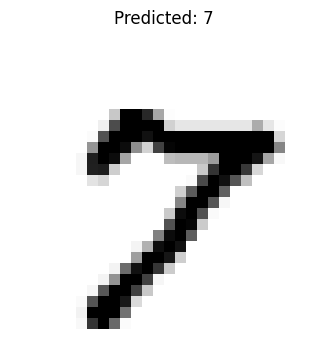

In [6]:
def predict_and_display(index):
    digit = X[index].reshape(28, 28)
    prediction = clf.predict([X[index]])[0]
    
    plt.figure(figsize=(4, 4))
    plt.imshow(digit, cmap='binary')
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
    plt.show()
    
# Test the function with a sample digit
predict_and_display(69000)
